# Hybrid scalability test - Combining MPI and OpenMP tests

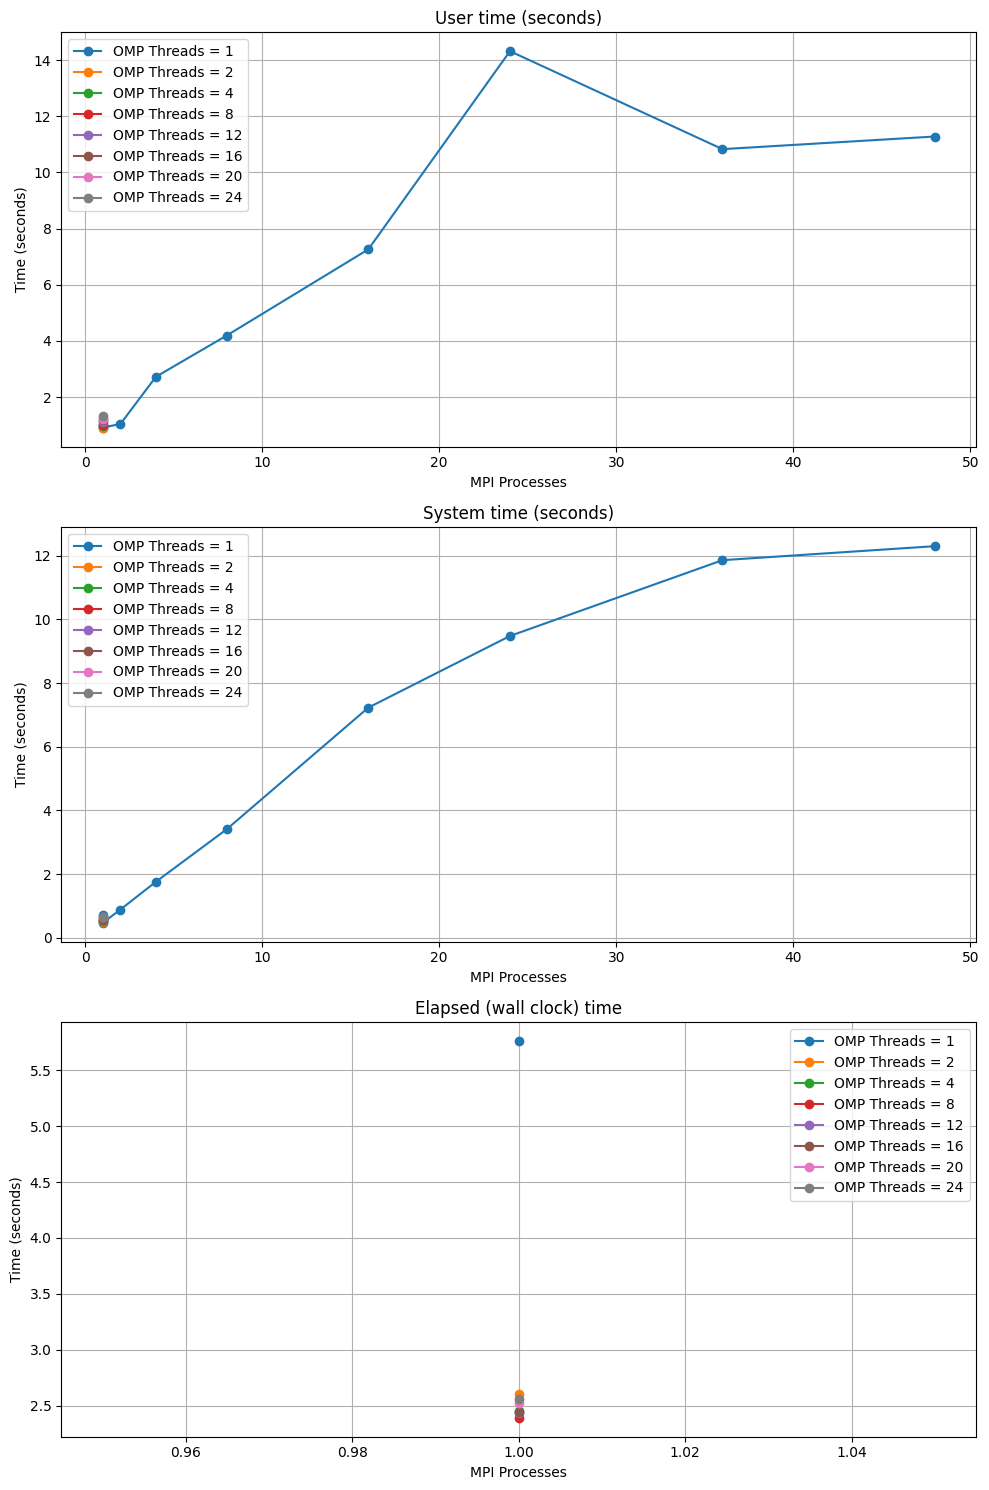

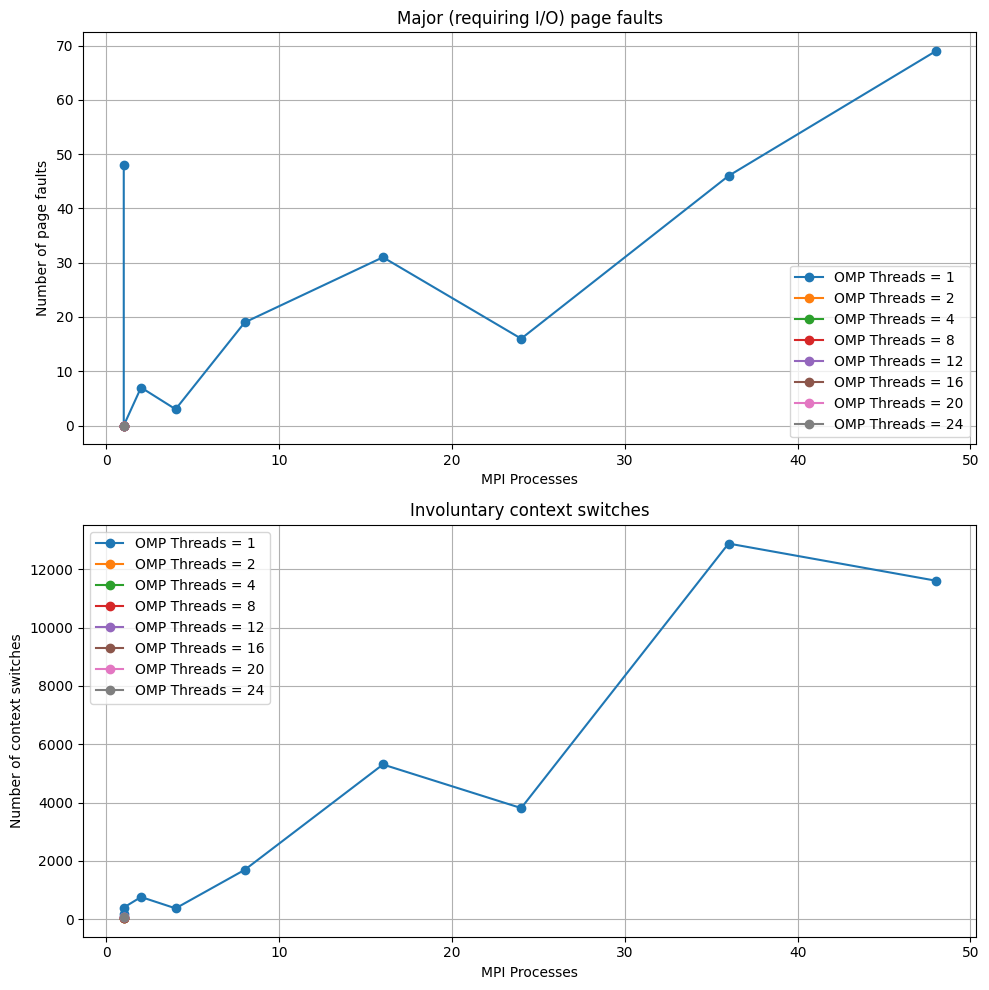

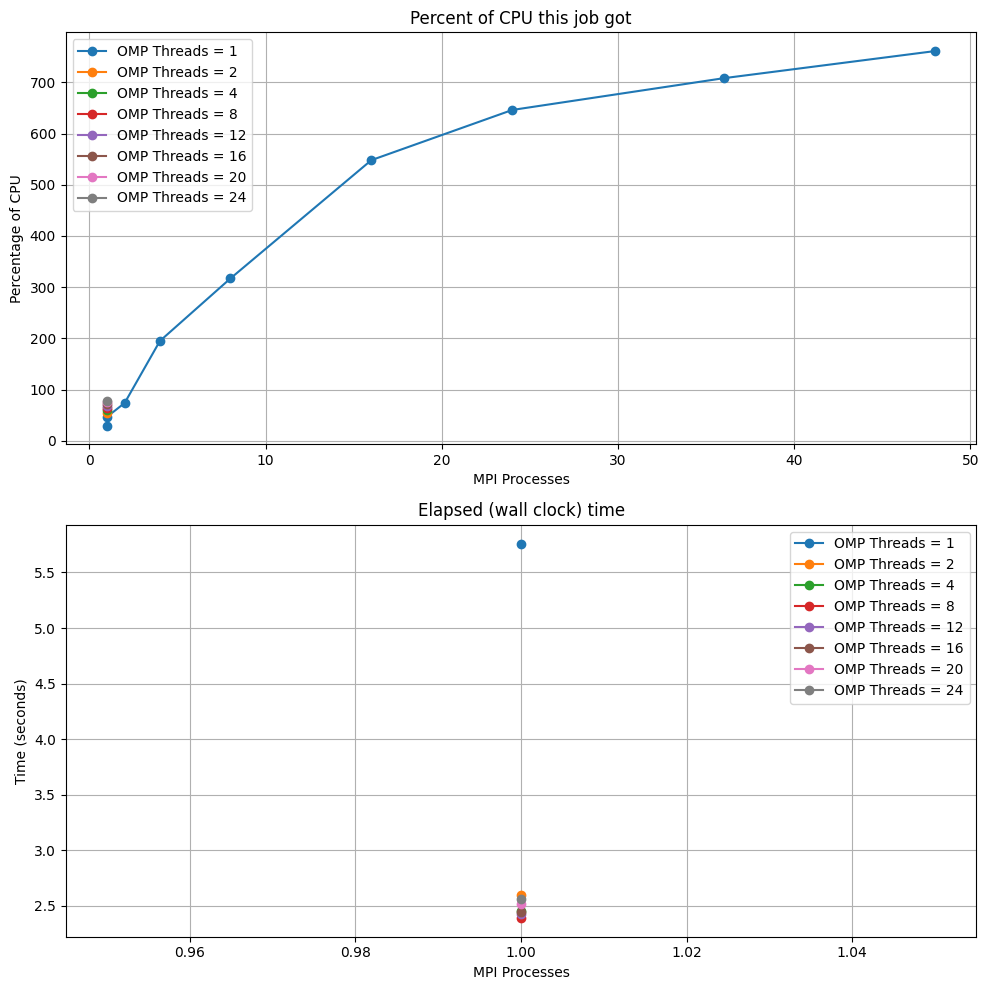

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from both CSV files
omp_csv_file = 'omp_scaling.csv'
mpi_csv_file = 'output_scal_mpi.csv'

omp_data = pd.read_csv(omp_csv_file)
mpi_data = pd.read_csv(mpi_csv_file)

# Harmonize column names and add missing columns
omp_data = omp_data.rename(columns={'np': 'OpenMP Threads'})
omp_data['MPI Processes'] = 1  # Since the OMP test was done on 1 node

# Ensure MPI data has the same structure and relevant columns
mpi_data = mpi_data.rename(columns={'MPI Processes': 'MPI Processes'})  # Adjust if necessary
mpi_data['OpenMP Threads'] = 1  # Assuming no OpenMP threads used in MPI scaling test

# Convert relevant columns to integers for consistency
omp_data['OpenMP Threads'] = omp_data['OpenMP Threads'].astype(int)
mpi_data['MPI Processes'] = mpi_data['MPI Processes'].astype(int)

# Combine the two DataFrames
combined_data = pd.concat([omp_data, mpi_data])

# Convert 'Percent of CPU this job got' to numeric
combined_data['Percent of CPU this job got'] = combined_data['Percent of CPU this job got'].str.rstrip('%').astype('float')

# Sort data by MPI Processes and OpenMP Threads
combined_data = combined_data.sort_values(by=['MPI Processes', 'OpenMP Threads'])

# Extract unique values for MPI Processes and OpenMP Threads
mpi_processes = sorted(combined_data['MPI Processes'].unique())
omp_threads = sorted(combined_data['OpenMP Threads'].unique())

# Create subplots for each analysis
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot 'User time (seconds)'
for omp in omp_threads:
    subset = combined_data[combined_data['OpenMP Threads'] == omp]
    ax[0].plot(subset['MPI Processes'], subset['User time (seconds)'], marker='o', label=f'OMP Threads = {omp}')
ax[0].set_title('User time (seconds)')
ax[0].set_xlabel('MPI Processes')
ax[0].set_ylabel('Time (seconds)')
ax[0].grid(True)
ax[0].legend()

# Plot 'System time (seconds)'
for omp in omp_threads:
    subset = combined_data[combined_data['OpenMP Threads'] == omp]
    ax[1].plot(subset['MPI Processes'], subset['System time (seconds)'], marker='o', label=f'OMP Threads = {omp}')
ax[1].set_title('System time (seconds)')
ax[1].set_xlabel('MPI Processes')
ax[1].set_ylabel('Time (seconds)')
ax[1].grid(True)
ax[1].legend()

# Plot 'Elapsed (wall clock) time (ss)'
for omp in omp_threads:
    subset = combined_data[combined_data['OpenMP Threads'] == omp]
    ax[2].plot(subset['MPI Processes'], subset['Elapsed (wall clock) time (ss)'], marker='o', label=f'OMP Threads = {omp}')
ax[2].set_title('Elapsed (wall clock) time')
ax[2].set_xlabel('MPI Processes')
ax[2].set_ylabel('Time (seconds)')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()

# Create subplots for bottleneck analysis
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot 'Major (requiring I/O) page faults'
for omp in omp_threads:
    subset = combined_data[combined_data['OpenMP Threads'] == omp]
    ax[0].plot(subset['MPI Processes'], subset['Major (requiring I/O) page faults'], marker='o', label=f'OMP Threads = {omp}')

ax[0].set_title('Major (requiring I/O) page faults')
ax[0].set_xlabel('MPI Processes')
ax[0].set_ylabel('Number of page faults')
ax[0].grid(True)
ax[0].legend()

# Plot 'Involuntary context switches'
for omp in omp_threads:
    subset = combined_data[combined_data['OpenMP Threads'] == omp]
    ax[1].plot(subset['MPI Processes'], subset['Involuntary context switches'], marker='o', label=f'OMP Threads = {omp}')
ax[1].set_title('Involuntary context switches')
ax[1].set_xlabel('MPI Processes')
ax[1].set_ylabel('Number of context switches')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

# Create subplots for parallelisation impact analysis
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot 'Percent of CPU this job got'
for omp in omp_threads:
    subset = combined_data[combined_data['OpenMP Threads'] == omp]
    ax[0].plot(subset['MPI Processes'], subset['Percent of CPU this job got'], marker='o', label=f'OMP Threads = {omp}')
ax[0].set_title('Percent of CPU this job got')
ax[0].set_xlabel('MPI Processes')
ax[0].set_ylabel('Percentage of CPU')
ax[0].grid(True)
ax[0].legend()

# Plot 'Elapsed (wall clock) time (ss)'
for omp in omp_threads:
    subset = combined_data[combined_data['OpenMP Threads'] == omp]
    ax[1].plot(subset['MPI Processes'], subset['Elapsed (wall clock) time (ss)'], marker='o', label=f'OMP Threads = {omp}')
ax[1].set_title('Elapsed (wall clock) time')
ax[1].set_xlabel('MPI Processes')
ax[1].set_ylabel('Time (seconds)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()